ეპოქა 0 დაკარგვა: 0.2783
ეპოქა 5000 დაკარგვა: 0.0009
ეპოქა 10000 დაკარგვა: 0.0003
ეპოქა 15000 დაკარგვა: 0.0002
ეპოქა 20000 დაკარგვა: 0.0001
ეპოქა 25000 დაკარგვა: 0.0001
ეპოქა 30000 დაკარგვა: 0.0001
ეპოქა 35000 დაკარგვა: 0.0001
ეპოქა 40000 დაკარგვა: 0.0001
ეპოქა 45000 დაკარგვა: 0.0001
ეპოქა 50000 დაკარგვა: 0.0001
ეპოქა 55000 დაკარგვა: 0.0000
ეპოქა 60000 დაკარგვა: 0.0000
ეპოქა 65000 დაკარგვა: 0.0000
ეპოქა 70000 დაკარგვა: 0.0000
ეპოქა 75000 დაკარგვა: 0.0000
ეპოქა 80000 დაკარგვა: 0.0000
ეპოქა 85000 დაკარგვა: 0.0000
ეპოქა 90000 დაკარგვა: 0.0000
ეპოქა 95000 დაკარგვა: 0.0000
გამომავალი ვარჯიშის შემდეგ
[[0.99414908]
 [0.00472088]
 [0.00510957]
 [0.99582739]
 [0.00408901]
 [0.99478607]
 [0.99518266]
 [0.00573388]]
ტესტის სიზუსტის პროცენტი: 100.0%


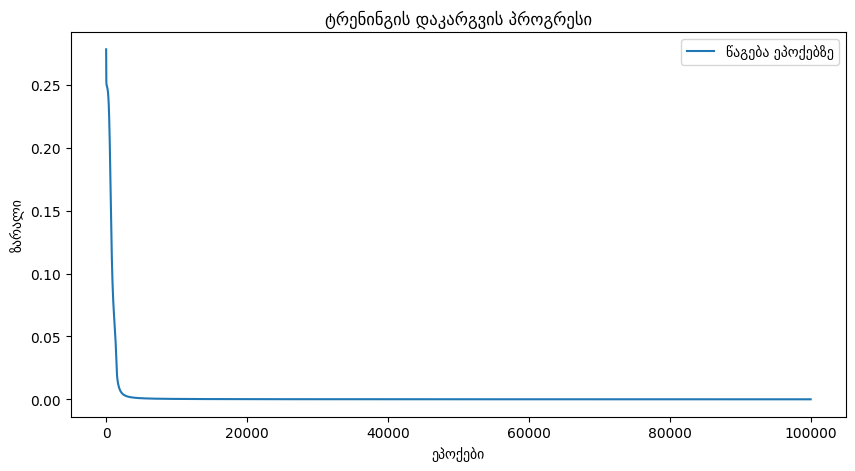

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# განახლებული შეყვანის მონაცემთა ნაკრები ახალი მნიშვნელობებით
inputs = np.array([
    [-1,-1, -1],
    [-1, -1, 1],
    [-1, 1, -1],
    [-1, 1, 1],
    [1, -1, -1],
    [1, -1, 1],
    [1, 1, -1],
    [1, 1, 1]
])

# განახლებული შედეგები პარიტეტული შემოწმებისთვის (-1-ების უცნაური რაოდენობა იწვევს 1-ს)
outputs = np.array([[1], [0], [0], [1], [0], [1], [1], [0]])

# საწყისი შემთხვევითი რიცხვების წარმოებისთვის
np.random.seed(42)

# წონების ინიცირება შემთხვევითი მნიშვნელობებით სამი შეყვანის ფუნქციისთვის
weights1 = np.random.uniform(size=(3, 4))
weights2 = np.random.uniform(size=(4, 1))

# სწავლის მაჩვენებელი
lr = 0.1
loss_history = []

# სასწავლო პროცესი
for epoch in range(100000):
    # მიმწოდებელი
    input_layer = inputs
    hidden_layer = sigmoid(np.dot(input_layer, weights1))
    output_layer = sigmoid(np.dot(hidden_layer, weights2))

    # უკან გამრავლება
    output_error = outputs - output_layer
    output_delta = output_error * sigmoid_derivative(output_layer)

    hidden_error = output_delta.dot(weights2.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)

    # წონების განახლება
    weights2 += hidden_layer.T.dot(output_delta) * lr
    weights1 += input_layer.T.dot(hidden_delta) * lr

    # დაკარგვა
    loss = np.mean(np.square(output_error))
    loss_history.append(loss)
    if epoch % 5000 == 0:
        print(f'ეპოქა {epoch} დაკარგვა: {loss:.4f}')

# ქსელის ტესტირება
print("გამომავალი ვარჯიშის შემდეგ")
print(output_layer)

# გამოთვალეთ პროგნოზების სიზუსტე
predicted = [1 if o > 0.5 else 0 for o in output_layer]
accuracy = np.mean(np.array(predicted) == outputs.flatten()) * 100

print(f'ტესტის სიზუსტის პროცენტი: {accuracy}%')

# დახატეთ ზარალი ეპოქების მანძილზე
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='წაგება ეპოქებზე')
plt.xlabel('ეპოქები')
plt.ylabel('ზარალი')
plt.title('ტრენინგის დაკარგვის პროგრესი')
plt.legend()
plt.show()
